<a href="https://colab.research.google.com/github/sidhu2690/CogniXis/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be developing a simple linear regression model using PyTorch.


In [187]:
# Let's create data for training our model

np.random.seed(42)
X = np.arange(1,1000)
y = 3 * X + 7

# Convert data to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [188]:
X_train, X_test, y_train, y_test= X[:800], X[800:], y[:800], y[800:]

In [189]:
type(X_train), len(X_train)

(torch.Tensor, 800)

We have successfully created the data. Now, let's create the model.

In [190]:
import torch
from torch import nn

In [191]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights =nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    self.bias= nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad= True))

  def forward(self, x):
    return self.weights*x+ self.bias

Model= LinearRegressionModel()

In [192]:
Model

LinearRegressionModel()

In [193]:
list(Model.parameters())

[Parameter containing:
 tensor([0.3240], requires_grad=True),
 Parameter containing:
 tensor([-0.9342], requires_grad=True)]

In [194]:
Model.state_dict()

OrderedDict([('weights', tensor([0.3240])), ('bias', tensor([-0.9342]))])

In [195]:
with torch.inference_mode():
  y_pred= Model(X_test)

with torch.no_grad():
  y_pred_1= Model(X_test)

torch.eq(y_pred, y_pred_1).sum()/len(y_pred)

tensor(1.)

Both the predictions are the same whether we use `torch.no_grad` or `torch.inference_mode`.


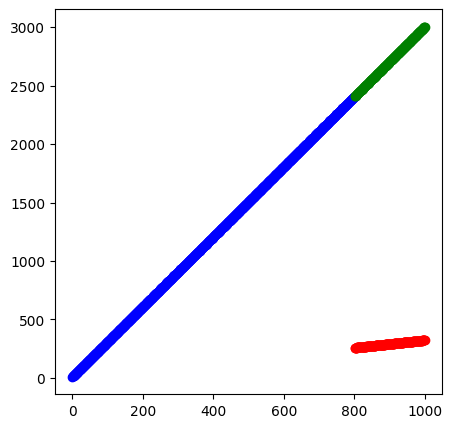

In [196]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_test, y_pred, c='r')

The predictions are not aligning with our expectations, so we need to move the red part to the green part.  
To do that, we have to train our model, which involves several steps, and we are going to do that.


In [197]:
loss_fn = torch.nn.L1Loss()   #MAE
optimizer = torch.optim.SGD(params=Model.parameters(), lr=0.001)

In [198]:
epochs = 10000

for epoch in range(epochs):
    # Training phase
    Model.train()
    y_pred = Model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss.item():.4f}")

# Plot the results
Model.eval()
with torch.inference_mode():
    y_pred = Model(X_test).detach().numpy()

Epoch: 0 | Training Loss: 1079.6915
Epoch: 500 | Training Loss: 11.2018
Epoch: 1000 | Training Loss: 28.3057
Epoch: 1500 | Training Loss: 4.3534
Epoch: 2000 | Training Loss: 10.1617
Epoch: 2500 | Training Loss: 23.1880
Epoch: 3000 | Training Loss: 5.3019
Epoch: 3500 | Training Loss: 5.1931
Epoch: 4000 | Training Loss: 4.3816
Epoch: 4500 | Training Loss: 17.8036
Epoch: 5000 | Training Loss: 15.5458
Epoch: 5500 | Training Loss: 4.7925
Epoch: 6000 | Training Loss: 6.1531
Epoch: 6500 | Training Loss: 15.8671
Epoch: 7000 | Training Loss: 11.4344
Epoch: 7500 | Training Loss: 8.4406
Epoch: 8000 | Training Loss: 24.9963
Epoch: 8500 | Training Loss: 15.4979
Epoch: 9000 | Training Loss: 5.2945
Epoch: 9500 | Training Loss: 10.1694


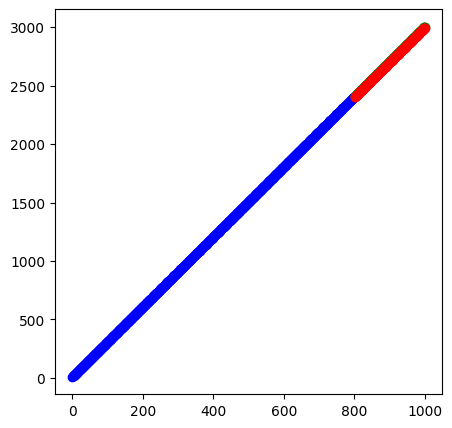

In [199]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_test, y_pred, c='r')

# DONE